In [10]:
pip install tensorflow

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [12]:
df = pd.read_csv('/content/drive/MyDrive/capstone 1/datasets/ecmlpkdd2007_selected_data.csv')

In [13]:
# Tokenization and padding
max_words = 5000  # Set the maximum number of words in your vocabulary
max_len = 100  # Set the maximum sequence length
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['data'])
sequences = tokenizer.texts_to_sequences(df['data'])
X = pad_sequences(sequences, maxlen=max_len)

In [14]:
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['class'])
y_one_hot = to_categorical(y_encoded, num_classes=3)  # 3 classes

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

In [15]:
# Build the CNN model
model = tf.keras.Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes
])

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
365/365 [==============================] - 12s 29ms/step - loss: 0.2500 - accuracy: 0.9235 - val_loss: 0.0866 - val_accuracy: 0.9818
Epoch 2/5
365/365 [==============================] - 9s 26ms/step - loss: 0.0815 - accuracy: 0.9837 - val_loss: 0.0835 - val_accuracy: 0.9846
Epoch 3/5
365/365 [==============================] - 9s 24ms/step - loss: 0.0532 - accuracy: 0.9890 - val_loss: 0.0794 - val_accuracy: 0.9849
Epoch 4/5
365/365 [==============================] - 10s 28ms/step - loss: 0.0296 - accuracy: 0.9941 - val_loss: 0.0911 - val_accuracy: 0.9849
Epoch 5/5
365/365 [==============================] - 8s 22ms/step - loss: 0.0155 - accuracy: 0.9966 - val_loss: 0.1075 - val_accuracy: 0.9801


In [19]:
from sklearn.metrics import accuracy_score

In [21]:
# Assuming you have trained your model and obtained predictions
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)  # Convert softmax probabilities to class labels

# Assuming y_test contains the true labels in one-hot encoded format
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to class labels

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Generate classification report
report = classification_report(y_true, y_pred)

# Print accuracy
print(f"Accuracy: {accuracy}")

# Print classification report
print(report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Calculate True Positive, False Positive, False Negative, and Precision for each class
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
precision = TP / (TP + FP)
recall = TP / (TP + FN)

# Calculate False Positive Rate and False Negative Rate
FPR = FP / (FP + TP)
FNR = FN / (FN + TP)

# Print metrics for each class
for i in range(len(precision)):
    print(f"Class {i} - Precision: {precision[i]}, Recall: {recall[i]}, FPR: {FPR[i]}, FNR: {FNR[i]}")


92/92 [==============================] - 1s 10ms/step
Accuracy: 0.9801369863013699
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       460
           1       0.98      0.99      0.99      2094
           2       0.97      0.96      0.96       366

    accuracy                           0.98      2920
   macro avg       0.98      0.97      0.97      2920
weighted avg       0.98      0.98      0.98      2920

Class 0 - Precision: 0.9796839729119639, Recall: 0.9434782608695652, FPR: 0.020316027088036117, FNR: 0.05652173913043478
Class 1 - Precision: 0.9824893516327496, Recall: 0.9914040114613181, FPR: 0.017510648367250355, FNR: 0.008595988538681949
Class 2 - Precision: 0.967032967032967, Recall: 0.9617486338797814, FPR: 0.03296703296703297, FNR: 0.03825136612021858


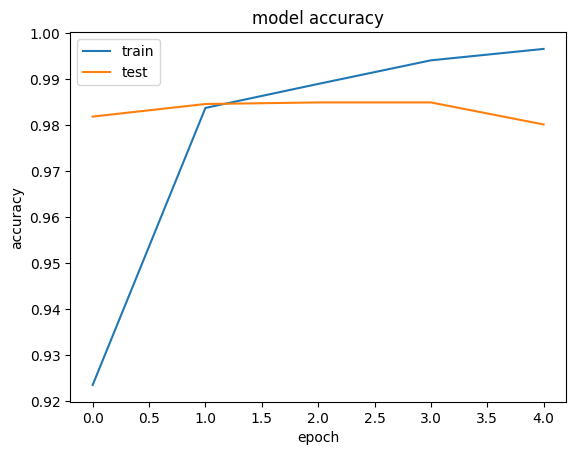

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc ='upper left')

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")

92/92 [==============================] - 1s 5ms/step - loss: 0.1067 - accuracy: 0.9812
Test accuracy: 0.9812
